# Compare two possibilies to define the ITCZ position

## Purpose

The ITCZ is typically defined by means of the precipitation centroid. The centroid offers a more stable metric compared to the location of the precipitation maximum, which for example is sensitive to small precipitation changes for the case of a "double ITCZ".

Yet, there are different choices what is meant by the centroid, and also within which latitude range it should be calculated (e.g., between 20N/S deg lat or 30N/S deg lat). The latter point is not studied here. The first point is investigated in the following.

At least two definitions of the centroid have been used:

1. The "Adam" definition, documented in Eq.1a of Adam et al., 2016, J. Climate, Seasonal and Interannual Variations of the Energy Flux Equator and ITCZ. Part I: Zonally Averaged ITCZ Position, https://journals.ametsoc.org/doi/full/10.1175/JCLI-D-15-0512.1 with N=1. Note that in Adam et al., 2016, the latitude boundaries were 20N/S deg lat.

2. The "Voigt" definition used in the Tracmip introduction paper Voigt et al., 2016, JAMES, https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016MS000748. Note that in Voigt et al., 2016, the latitude boundaries were 30N/S deg lat.

Both definitions have been used as illustrated by the following non-exhaustive list:

 * Frierson, D. and Y.-T. Hwang (2012), Extratropical Influence on ITCZ Shifts in Slab Ocean Simulations of Global Warming, Journal of Climate, DOI: 10.1175/JCLI-D-11-00116.1 (Voigt definition with 15N/S deg lat; indeed this is where the "Voigt" definition originates from)
 * Voigt, A. et al. (2014), The radiative impact of clouds on the shift of the Intertropical Convergence Zone, Geophys. Res. Lett., 41, 4308–4315, doi:10.1002/2014GL060354. (Voigt definition with 30N/S deg lat)
 * Voigt, A. et al. (2014), Compensation of Hemispheric Albedo Asymmetries by Shifts of the ITCZ and Tropical Clouds, Journal of Climate, https://doi.org/10.1175/JCLI-D-13-00205.1. (Voigt definition with 30N/S deg lat)
 * Donohoe, A. and A. Voigt (2017), Why Future Shifts in Tropical Precipitation Will Likely Be Small: The Location of the Tropical Rain Belt and the Hemispheric Contrast of Energy Input to the Atmosphere, Climate Extremes: Patterns and Mechanisms, AGU Book. (Voigt definition with 20N/S deg lat)

In the following, we will document to what extent the two definitions differ quantitatively. We do so by using precipitation from the TRACMIP aquaControl simulations that are described in Voigt et al., 2016, JAMES and that we access via the pangeo cloud. 

The ITCZ definition problem might seem an academic problem - the precipitation is what it is, independent of how we decide to diagnose the ITCZ position. But in fact the choice of definition can be important for conceptual pictures of the ITCZ and tropical rainfall, such as those embodied in the so-called energetic framework that link the ITCZ position to cross-equatorial atmosphere energy transport. The ratio of ITCZ position and energy transport could thus be sensitive to how the ITCZ position is diagnosed.

## Background

The Adam-based definition uses the equation:
    
\begin{equation}
  \varphi_\text{Adam}= \frac{ \int_{-\varphi_0}^{\varphi_0} \varphi P(\varphi) \cos\varphi d\varphi }{ \int_{-\varphi_0}^{\varphi_0} P(\varphi) \cos\varphi d\varphi } .
\end{equation}

This defintion of the ITCZ position is in analogy to a lever, where the force is the product of the weight (precipition P) and the distance from the fulcrum (abs(latitude-ITCZ position)). Thus, for the Adam definition one has 

\begin{equation}
  \int_{-\varphi_0}^{\varphi_\text{Adam}} abs(\varphi-\varphi_\text{Adam}) P(\varphi) \cos\varphi d\varphi = \int_{\varphi_\text{Adam}}^{\varphi_0} abs(\varphi-\varphi_\text{Adam}) P(\varphi) \cos\varphi d\varphi .
\end{equation}

The Voigt-based definition instead follows the idea that the ITCZ is given by the latitude for which the sum of the area-weighted precipitation south and north of it are the same:

\begin{equation}
  \int_{-\varphi_0}^{\varphi_\text{Voigt}} P(\varphi) \cos\varphi d\varphi = \int_{\varphi_\text{Voigt}}^{\varphi_0} P(\varphi) \cos\varphi d\varphi .
\end{equation}

I.e., while the Adam definition weighs precip more strongly according to its distance from the "fulcrum", the Voigt definition just has two buckets of precip that need to have the same filling level but are at the same distance from the fulcrum.

This shows that while both definitions are closely related, the Adam definition gives more weight to latitudes further away from the diagnosed ITCZ. As a result, it will tend to put the ITCZ closer to the equator than the Voigt definition, for which it does not matter whether the precipitation falls near or far from the diagnosed ITCZ.

## Analysis

### Load Tracmip aquaControl precipitation

In [1]:
from intake import open_catalog
# get whole pangeo catalogue
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/climate.yaml")
# select tracmip collection
col = cat.tracmip()
# load data into dictionary
ds_dict = col.search(frequency='Amon', experiment=['aquaControl'],
                     variable=['pr']).to_dataset_dict(zarr_kwargs={'consolidated': True})

Dataset(s):   0%|                                       | 0/14 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'model.experiment.frequency'


Dataset(s): 100%|██████████████████████████████| 14/14 [00:09<00:00,  1.47it/s]


In [2]:
# uncomment the following line to check content of dataset dictionary ds_dict
#print(ds_dict.keys())
# lists of models
models = list(col.df.model.unique())

### Calculate ITCZ positions according to Adam and Voigt definitions

Dictionary of model colors, same as in Voigt et al. 2016, JAMES, TRACMIP introduction paper

In [3]:
import numpy as np
dict_color = {'AM21': np.array([1. , 0.8, 0.6]), 'CAM3':np.array([0.50196078, 0.50196078, 0.50196078]), 
              'CAM4': np.array([0.58039216, 1.        , 0.70980392]), 'CAM5Nor':np.array([0.76078431, 0.        , 0.53333333]), 
              'CNRM-AM5': np.array([0.        , 0.2       , 0.50196078]), 'ECHAM61':np.array([0.        , 0.45882353, 0.8627451 ]), 
              'ECHAM63':np.array([0.6       , 0.24705882, 0.        ]), 'GISS-ModelE2':np.array([0.61568627, 0.8       , 0.        ]),
              'LMDZ5A':np.array([0.29803922, 0.        , 0.36078431]), 'MetUM-CTL':np.array([0.09803922, 0.09803922, 0.09803922]),
              'MetUM-ENT':np.array([0.        , 0.36078431, 0.19215686]), 'MIROC5':np.array([0.16862745, 0.80784314, 0.28235294]), 
              'MPAS':np.array([0.56078431, 0.48627451, 0.        ]), 'CALTECH': np.array([1.        , 0.64313725, 0.01960784])}

Load my implementation of the ITCZ definitions

In [4]:
import itcz

**Calculate ITCZ positions using the zonal-mean time-mean precipitation from the last 30 years of the aquaControl simulation using the latitude boundaries of 20N/S deg lat**

In [5]:
for mod in models:
    ds_dict[mod+'.aquaControl.Amon']['itcz_adam'] = (
         itcz.get_itczposition_adam(ds_dict[mod+'.aquaControl.Amon']['pr'][-360:,:,:].mean(['time','lon']),    
                             ds_dict[mod+'.aquaControl.Amon'].lat, latboundary=20, dlat=0.1) )
    ds_dict[mod+'.aquaControl.Amon']['itcz_voigt'] = (
         itcz.get_itczposition_voigt(ds_dict[mod+'.aquaControl.Amon']['pr'][-360:,:,:].mean(['time','lon']),    
                             ds_dict[mod+'.aquaControl.Amon'].lat, latboundary=20, dlat=0.05) )

**Scatter plot of Adam versus Voigt definitions (left panel) and the ratio of the two (right panel):**

This shows that the two definitions agree well, but that the Voigt definition yields more poleward ITCZ position, in agreement with the considerations in the background section.

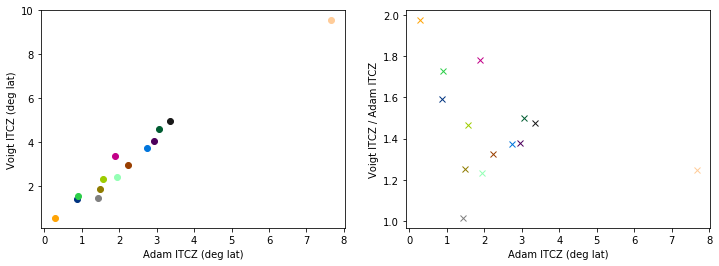

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for mod in models:
    plt.plot(ds_dict[mod+'.aquaControl.Amon']['itcz_adam'],
             ds_dict[mod+'.aquaControl.Amon']['itcz_voigt'],'o', color=dict_color[mod])
plt.xlabel('Adam ITCZ (deg lat)'); plt.ylabel('Voigt ITCZ (deg lat)');
    
plt.subplot(1,2,2)
for mod in models:
    plt.plot(ds_dict[mod+'.aquaControl.Amon']['itcz_adam'],
             ds_dict[mod+'.aquaControl.Amon']['itcz_voigt']/ds_dict[mod+'.aquaControl.Amon']['itcz_adam'],'x', color=dict_color[mod])
plt.xlabel('Adam ITCZ (deg lat)'); plt.ylabel('Voigt ITCZ / Adam ITCZ');

**Test that the Voigt and Adam results agree with the integral equations given in the background section.**

We use the criterion that for both definitions the l.h.s and r.h.s agree within 1%. Note that the ITCZ positions are recalculated within the test subroutines.

In [7]:
for mod in models:
    lhs, rhs = itcz.test_itczposition_adam(ds_dict[mod+'.aquaControl.Amon']['pr'][-360:,:,:].mean(['time','lon']),
                            ds_dict[mod+'.aquaControl.Amon'].lat, 20, 0.1)
    if (np.abs(lhs-rhs)>0.01*rhs):
        print(mod, ': Adam test FAILED!')
    else:
        print(mod, ': Adam test passed!')

AM21 : Adam test passed!
CAM4 : Adam test passed!
CAM5Nor : Adam test passed!
CNRM-AM5 : Adam test passed!
ECHAM61 : Adam test passed!
ECHAM63 : Adam test passed!
GISS-ModelE2 : Adam test passed!
MIROC5 : Adam test passed!
MPAS : Adam test passed!
MetUM-CTL : Adam test passed!
MetUM-ENT : Adam test passed!
CAM3 : Adam test passed!
LMDZ5A : Adam test passed!
CALTECH : Adam test passed!


In [8]:
for mod in models:
    lhs, rhs = itcz.test_itczposition_voigt(ds_dict[mod+'.aquaControl.Amon']['pr'][-360:,:,:].mean(['time','lon']),
                            ds_dict[mod+'.aquaControl.Amon'].lat, 20, 0.05)
    if (np.abs(lhs-rhs)>0.01*rhs):
        print(mod, ': Voigt test FAILED!')
    else:
        print(mod, ': Voigt test passed!')

AM21 : Voigt test passed!
CAM4 : Voigt test passed!
CAM5Nor : Voigt test passed!
CNRM-AM5 : Voigt test passed!
ECHAM61 : Voigt test passed!
ECHAM63 : Voigt test passed!
GISS-ModelE2 : Voigt test passed!
MIROC5 : Voigt test passed!
MPAS : Voigt test passed!
MetUM-CTL : Voigt test passed!
MetUM-ENT : Voigt test passed!
CAM3 : Voigt test passed!
LMDZ5A : Voigt test passed!
CALTECH : Voigt test passed!
